In [ ]:
# Grant access to google drive.
# Run this cell, then you’ll see a link, click on that link, allow access
# Copy the code that pops up, paste it in the box, hit Enter

from google.colab import drive
drive.mount('/content/gdrive')

# Change working directory to be current folder
# os.chdir('/content/gdrive/My Drive/Your Folder Name/Your sub Folder Name')
os.chdir('/content/gdrive/My Drive/BA5002_new')
!ls

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
 corplotAllvar.ipynb	        sentiment_analysis.csv
 corplot.ipynb		        sentiment_analysis.ipynb
 data_corrNew.png	        sentiment_analysis.xlsx
 data_corr.png		        sentimentBuild.xlsx
 EDA.ipynb		        sentimentNegative.png
 LDA.ipynb		        sentimentpositive.png
 NegativeNew0.2.xlsx	        StrongPostive.xlsx
 PositiveReview.xlsx	        test.xlsx
'RandomForest&Logistic.ipynb'   train.xlsx
 RandomForestNew.ipynb	        wordcloud.ipynb
 reviews_new.csv	        wordcloudNeg0.2.ipynb
 reviews_new.xlsx	        数据1014.xlsx
'RF-无days of comments.ipynb'   新增数据.xlsx


In [ ]:
# import libraries
import csv
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# df= pd.read_csv(open('sentiment_analysis.csv',encoding='utf-8',errors='ignore'))

# data
df= pd.read_excel('数据1014.xlsx')
df.head()
df=pd.DataFrame(df)
df.head()

,content,score,thumbsUpCount,reviewCreatedVersionAdjusted,at,replyContent,repliedAt,sortOrder,Subjectivity,Polarity,AnalysisNew,Analysis,length,usefulness,ABS,Days of comments
0,"I love this game, but lately I have tried to l...",1,2,3.1.0,2022-10-13 21:08:10,"Hello Traveler, thank you for supporting Gensh...",2022-10-13 21:19:58,most_relevant,0.551852,0.056481,Positive,Positive,89,0,2,17
1,Genshin Impact is a very pretty game with a lo...,3,1,3.1.0,2022-10-13 20:38:57,"Thank you for supporting Genshin Impact, Trave...",2022-10-13 21:19:42,most_relevant,0.496759,0.160185,Positive,Positive,90,0,0,17
2,"Another year, another review. This is an amazi...",4,6,3.1.0,2022-10-13 10:07:51,NaN,NaT,most_relevant,0.668182,0.275758,Positive,Positive,88,1,1,17
3,"Beautiful and amazing game, bit laggy occassio...",4,1,3.1.0,2022-10-13 06:35:44,NaN,NaT,most_relevant,0.700000,0.083333,Positive,Positive,65,0,1,17
4,"khm, i wouldn't recommend this game to anyone,...",3,0,3.1.0,2022-10-13 06:31:22,NaN,NaT,most_relevant,0.343750,0.081250,Positive,Positive,93,0,0,17


In [ ]:
data=df[['score','Polarity','Subjectivity','thumbsUpCount','length','ABS','Days of comments']]
data.head()

,score,Polarity,Subjectivity,thumbsUpCount,length,ABS,Days of comments
0,1,0.056481,0.551852,2,89,2,17
1,3,0.160185,0.496759,1,90,0,17
2,4,0.275758,0.668182,6,88,1,17
3,4,0.083333,0.700000,1,65,1,17
4,3,0.081250,0.343750,0,93,0,17


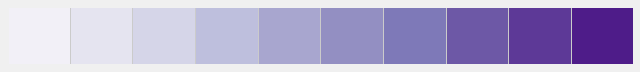

In [ ]:
sns.palplot(sns.color_palette("Purples", 10)) 

In [16]:
new_purples=sns.color_palette("Purples", 10)[0:7]

                     score  Polarity  Subjectivity  thumbsUpCount    length  \
score             1.000000  0.369249      0.102463       0.128725 -0.048584   
Polarity          0.369249  1.000000      0.179862       0.095159 -0.008227   
Subjectivity      0.102463  0.179862      1.000000       0.070548  0.210600   
thumbsUpCount     0.128725  0.095159      0.070548       1.000000  0.199179   
length           -0.048584 -0.008227      0.210600       0.199179  1.000000   
ABS              -0.008625  0.030687      0.028795       0.045825 -0.027166   
Days of comments -0.097052 -0.008367      0.061975       0.056463  0.265226   

                       ABS  Days of comments  
score            -0.008625         -0.097052  
Polarity          0.030687         -0.008367  
Subjectivity      0.028795          0.061975  
thumbsUpCount     0.045825          0.056463  
length           -0.027166          0.265226  
ABS               1.000000         -0.031913  
Days of comments -0.031913          1.

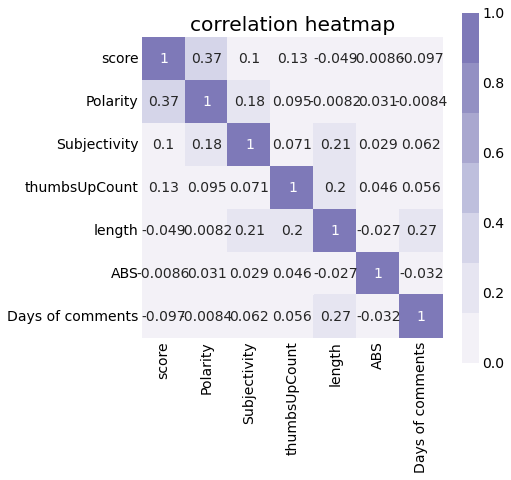

In [ ]:
# -*- coding: utf-8 -*-
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus']=False

# 导入数据
data_coor = data.corr()
print(data_coor)

fig, ax = plt.subplots(figsize=(6, 6),facecolor='w')
# 指定颜色带的色系
sns.heatmap(data.corr(),annot=True,  vmin=0, vmax=1, square=True, cmap=new_purples, fmt='.2g')
plt.title('correlation heatmap')
plt.show()

fig.savefig('./data_corrNew.png',bbox_inches='tight',transparent=True)
